<a href="https://colab.research.google.com/github/IA-2025-1/flights/blob/main/flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/flights.csv', dtype={'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str})
df_reduzido = df.sample(n=100000, random_state=42)
df_reduzido.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
40061,2015,1,3.0,6.0,AA,1425.0,N493AA,DFW,IAD,1510.0,...,1854.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
225094,2015,1,15.0,4.0,NK,642.0,N519NK,TPA,DTW,1450.0,...,1802.0,37.0,0.0,0.0,NaN,2.0,0.0,35.0,0.0,0.0
259748,2015,1,17.0,6.0,US,675.0,N909AW,HNL,PHX,2350.0,...,759.0,-44.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
279480,2015,1,19.0,1.0,US,1949.0,N624AW,CLT,RDU,1115.0,...,1156.0,-7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
202110,2015,1,14.0,3.0,US,1803.0,N938UW,CLT,PHX,730.0,...,1020.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Tratando valores nan
df.fillna(0, inplace=True)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1.0,4.0,AS,98.0,N407AS,ANC,SEA,5.0,...,408.0,-22.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2015,1,1.0,4.0,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,741.0,-9.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,2015,1,1.0,4.0,US,840.0,N171US,SFO,CLT,20.0,...,811.0,5.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,2015,1,1.0,4.0,AA,258.0,N3HYAA,LAX,MIA,20.0,...,756.0,-9.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,2015,1,1.0,4.0,AS,135.0,N527AS,SEA,ANC,25.0,...,259.0,-21.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [4]:
num_rows, num_columns = df.shape
print(f"Quantidade de objetos (linhas): {num_rows}")
print(f"Quantidade de atributos (colunas): {num_columns}")

Quantidade de objetos (linhas): 320798
Quantidade de atributos (colunas): 31


In [5]:
print("Tipos de dados dos atributos:")
print(df.dtypes)

Tipos de dados dos atributos:
YEAR                     int64
MONTH                    int64
DAY                    float64
DAY_OF_WEEK            float64
AIRLINE                 object
FLIGHT_NUMBER          float64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE    float64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               float64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      float64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               float64
CANCELLED              float64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: ob

In [6]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['year', 'month','arr_flights'], errors='ignore')
print("Resumo estatístico dos atributos numéricos:")
print(numeric_columns.describe())

Resumo estatístico dos atributos numéricos:
           YEAR     MONTH            DAY    DAY_OF_WEEK  FLIGHT_NUMBER  \
count  320798.0  320798.0  320798.000000  320798.000000  320798.000000   
mean     2015.0       1.0      10.917141       3.939473    2261.079639   
std         0.0       0.0       6.076438       1.994029    1807.978119   
min      2015.0       1.0       0.000000       0.000000       0.000000   
25%      2015.0       1.0       6.000000       2.000000     757.000000   
50%      2015.0       1.0      11.000000       4.000000    1726.000000   
75%      2015.0       1.0      16.000000       6.000000    3480.000000   
max      2015.0       1.0      22.000000       7.000000    9793.000000   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY       TAXI_OUT  \
count        320798.000000   320798.000000    320798.000000  320798.000000   
mean           1324.200360     1313.101425        12.027160      16.308711   
std             470.383195      510.695199        39.01

In [7]:
## Objetivo

## Prever se um voo comercial terá um atraso superior a 15 minutos com base em dados disponíveis antes da decolagem, utilizando técnicas de aprendizado de máquina como Decision Tree e Gradient Boosting. O objetivo é apoiar a tomada de decisão de companhias aéreas, aeroportos e passageiros.


In [8]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320798 entries, 0 to 320797
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 320798 non-null  int64  
 1   MONTH                320798 non-null  int64  
 2   DAY                  320798 non-null  float64
 3   DAY_OF_WEEK          320798 non-null  float64
 4   AIRLINE              320798 non-null  object 
 5   FLIGHT_NUMBER        320798 non-null  float64
 6   TAIL_NUMBER          320798 non-null  object 
 7   ORIGIN_AIRPORT       320798 non-null  object 
 8   DESTINATION_AIRPORT  320798 non-null  object 
 9   SCHEDULED_DEPARTURE  320798 non-null  float64
 10  DEPARTURE_TIME       320798 non-null  float64
 11  DEPARTURE_DELAY      320798 non-null  float64
 12  TAXI_OUT             320798 non-null  float64
 13  WHEELS_OFF           320798 non-null  float64
 14  SCHEDULED_TIME       320798 non-null  float64
 15  ELAPSED_TIME     

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,0
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


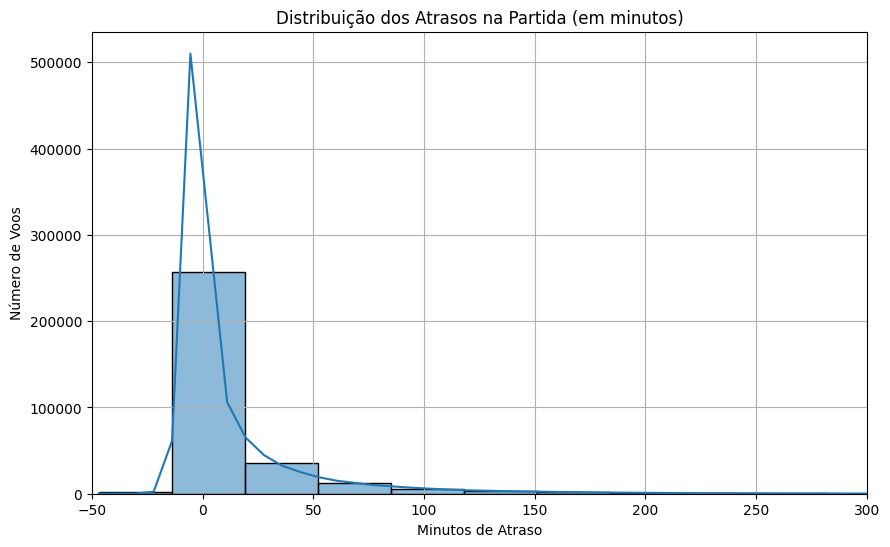

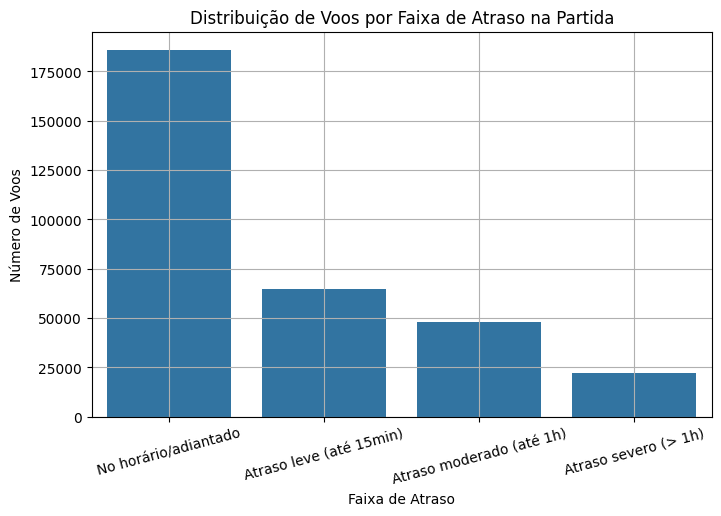

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma dos atrasos na partida
plt.figure(figsize=(10, 6))
sns.histplot(df['DEPARTURE_DELAY'].dropna(), bins=50, kde=True)
plt.title('Distribuição dos Atrasos na Partida (em minutos)')
plt.xlabel('Minutos de Atraso')
plt.ylabel('Número de Voos')
plt.xlim(-50, 300)
plt.grid(True)
plt.show()

# Classificação por faixa
df['FAIXA_ATRASO'] = pd.cut(df['DEPARTURE_DELAY'],
                            bins=[-float('inf'), 0, 15, 60, float('inf')],
                            labels=['No horário/adiantado', 'Atraso leve (até 15min)', 'Atraso moderado (até 1h)', 'Atraso severo (> 1h)'])

plt.figure(figsize=(8, 5))
sns.countplot(x='FAIXA_ATRASO', data=df, order=df['FAIXA_ATRASO'].value_counts().index)
plt.title('Distribuição de Voos por Faixa de Atraso na Partida')
plt.xlabel('Faixa de Atraso')
plt.ylabel('Número de Voos')
plt.xticks(rotation=15)
plt.grid(True)
plt.show()


# **PRIMEIRA ANÁLISE:**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Criar variável-alvo binária: 1 = atraso > 15 minutos, 0 = não
df['ATRASO'] = df['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 15 else 0)

# Selecionar variáveis preditoras (exemplo simples)
X = df[['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHEDULED_DEPARTURE', 'DISTANCE', 'AIR_TIME']]
y = df['ATRASO']

# Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


              precision    recall  f1-score   support

           0       0.81      0.92      0.86     49696
           1       0.48      0.24      0.32     14464

    accuracy                           0.77     64160
   macro avg       0.64      0.58      0.59     64160
weighted avg       0.73      0.77      0.74     64160



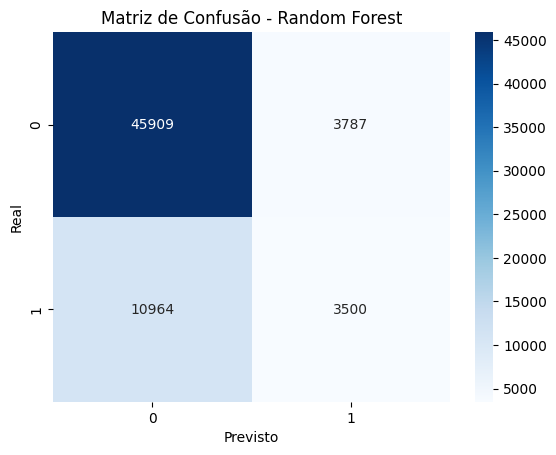

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Treinamento
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Previsão
y_pred = clf.predict(X_test_scaled)

# Avaliação
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


# **ANÁLISE ENRIQUECIDA:**

In [15]:
from sklearn.preprocessing import LabelEncoder

for col in ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']:
    # Converter todos os valores para string e preencher NaNs
    X[col] = X[col].astype(str).fillna('UNKNOWN')

    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Padronizar antes do SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear as classes
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)


              precision    recall  f1-score   support

           0       0.86      0.73      0.79     49696
           1       0.39      0.59      0.47     14464

    accuracy                           0.70     64160
   macro avg       0.62      0.66      0.63     64160
weighted avg       0.75      0.70      0.72     64160



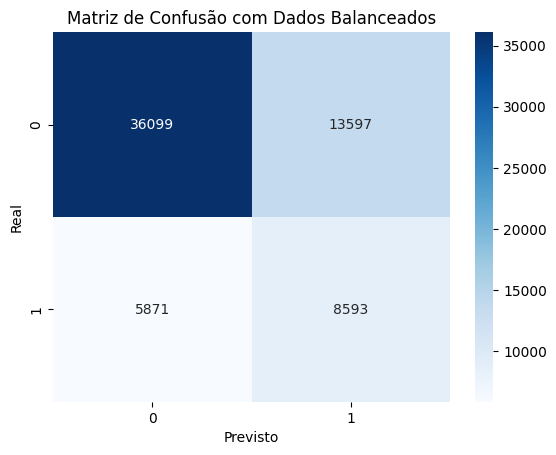

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Treinar modelo com dados balanceados
clf = GradientBoostingClassifier()
clf.fit(X_train_bal, y_train_bal)

# Avaliar
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão com Dados Balanceados")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


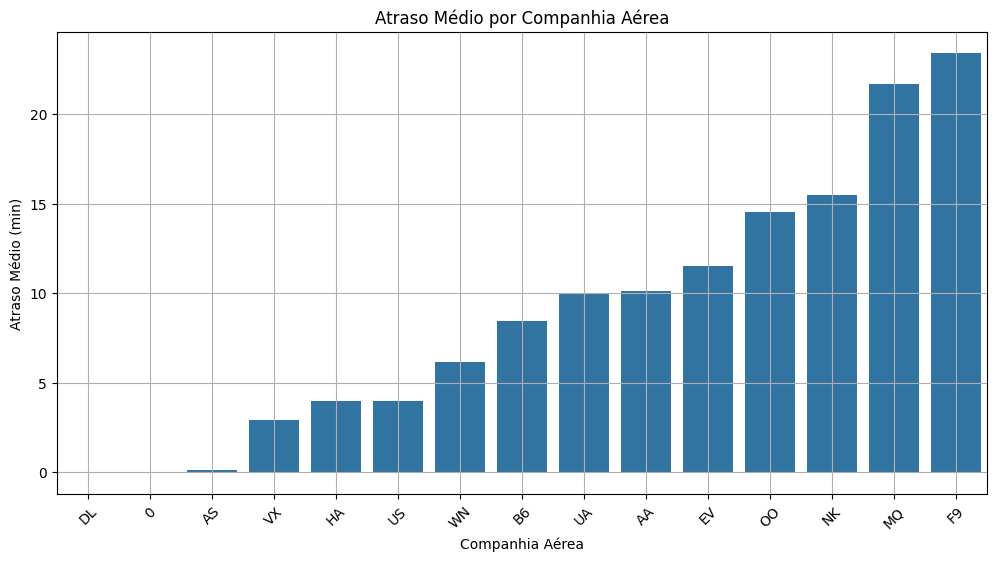

In [18]:
# Atraso médio por companhia
airline_delay = df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=airline_delay.index, y=airline_delay.values)
plt.xticks(rotation=45)
plt.title("Atraso Médio por Companhia Aérea")
plt.ylabel("Atraso Médio (min)")
plt.xlabel("Companhia Aérea")
plt.grid(True)
plt.show()
